# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [95]:
#libraries 
import pandas as pd
import numpy as nm

In [96]:
df = pd.read_csv("/kaggle/input/card-fraud1/fraudTest.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [97]:
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [98]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)
print(df)

            Id trans_date_trans_time            cc_num  \
0            0   2020-06-21 12:14:25  2291163933867244   
1            1   2020-06-21 12:14:33  3573030041201292   
2            2   2020-06-21 12:14:53  3598215285024754   
3            3   2020-06-21 12:15:15  3591919803438423   
4            4   2020-06-21 12:15:17  3526826139003047   
...        ...                   ...               ...   
555714  555714   2020-12-31 23:59:07    30560609640617   
555715  555715   2020-12-31 23:59:09  3556613125071656   
555716  555716   2020-12-31 23:59:15  6011724471098086   
555717  555717   2020-12-31 23:59:24     4079773899158   
555718  555718   2020-12-31 23:59:34  4170689372027579   

                                    merchant        category     amt    first  \
0                      fraud_Kirlin and Sons   personal_care    2.86     Jeff   
1                       fraud_Sporer-Keebler   personal_care   29.84   Joanne   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness

In [99]:
print(df.columns)

Index(['Id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [100]:
print(df.dtypes)

Id                         int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [101]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['first'] = df['first'].astype(str)
df['last'] = df['last'].astype(str)
df['gender'] = df['gender'].astype(str)
df['street'] = df['street'].astype(str)
df['city'] = df['city'].astype(str)
df['state'] = df['state'].astype(str)

In [102]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


numerical_columns = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Print the normalized DataFrame
print(df.head())

   Id trans_date_trans_time            cc_num  \
0   0   2020-06-21 12:14:25  2291163933867244   
1   1   2020-06-21 12:14:33  3573030041201292   
2   2   2020-06-21 12:14:53  3598215285024754   
3   3   2020-06-21 12:15:15  3591919803438423   
4   4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category       amt   first  \
0                 fraud_Kirlin and Sons   personal_care  0.000082    Jeff   
1                  fraud_Sporer-Keebler   personal_care  0.001267  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  0.001769  Ashley   
3                     fraud_Haley Group        misc_pos  0.002594   Brian   
4                 fraud_Johnston-Casper          travel  0.000096  Nathan   

       last gender                       street  ...       lat      long  \
0   Elliott      M            351 Darlene Green  ...  0.305255  0.867121   
1  Williams      F             3638 Marsh Union  ...  0.444423  0.565239   
2     Lopez   

In [103]:
# Extract year, month, and day from 'trans_date_trans_time' and 'dob' columns
df['dob'] = pd.to_datetime(df['dob'])
df['trans_year'] = df['trans_date_trans_time'].dt.year
df['trans_month'] = df['trans_date_trans_time'].dt.month
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['dob_year'] = df['dob'].dt.year
df['dob_month'] = df['dob'].dt.month
df['dob_day'] = df['dob'].dt.day

In [104]:
print(df.columns)

Index(['Id', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'trans_year', 'trans_month', 'trans_day',
       'dob_year', 'dob_month', 'dob_day'],
      dtype='object')


In [105]:
import pandas as pd

# Count the number of fraudulent and legitimate transactions
fraudulent_count = df['is_fraud'].sum()
legitimate_count = len(df) - fraudulent_count

# Calculate the percentage of fraudulent and legitimate transactions
total_transactions = len(df)
fraudulent_percentage = (fraudulent_count / total_transactions) * 100
legitimate_percentage = (legitimate_count / total_transactions) * 100

print("Fraudulent transactions: {} ({:.2f}%)".format(fraudulent_count, fraudulent_percentage))
print("Legitimate transactions: {} ({:.2f}%)".format(legitimate_count, legitimate_percentage))

Fraudulent transactions: 2145 (0.39%)
Legitimate transactions: 553574 (99.61%)


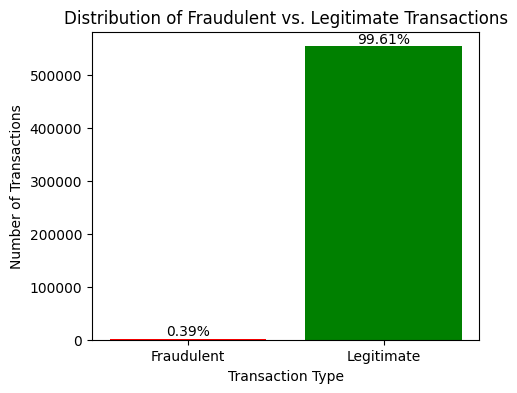

In [106]:
#q1
import matplotlib.pyplot as plt

# Count the number of fraudulent and legitimate transactions
total_transactions = len(df)
fraudulent_count = df['is_fraud'].sum()
legitimate_count = total_transactions - fraudulent_count

# Calculate the percentage of fraudulent and legitimate transactions
fraudulent_percentage = (fraudulent_count / total_transactions) * 100
legitimate_percentage = (legitimate_count / total_transactions) * 100

# Create a bar plot
plt.figure(figsize=(5, 4))
bars = plt.bar(['Fraudulent', 'Legitimate'], [fraudulent_count, legitimate_count], color=['red', 'green'])
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')

# Add labels above the bars with percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '%.2f%%' % (height / total_transactions * 100), ha='center', va='bottom')

plt.show()

In [107]:
import pandas as pd


# You can replace 'category_column' with the actual name of the column containing transaction categories
top_categories = df['category'].value_counts().head(5)  # Get the top 5 most common categories
print("Most common transaction categories:")
print(top_categories)

Most common transaction categories:
category
gas_transport    56370
grocery_pos      52553
home             52345
shopping_pos     49791
kids_pets        48692
Name: count, dtype: int64


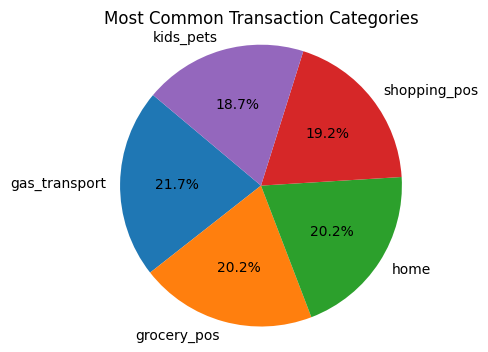

In [108]:
#q2
import matplotlib.pyplot as plt

# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Most Common Transaction Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [109]:
#q3

# Calculate the average transaction amount
average_transaction_amount = df['amt'].mean()

print("Average transaction amount: ${:.2f}".format(average_transaction_amount))

Average transaction amount: $0.00


In [110]:
#q3

# Calculate the average transaction amount
average_transaction_amount = df['amt'].mean()

print("Average transaction amount: ${:.2f}".format(average_transaction_amount))

Average transaction amount: $0.00


In [111]:
#Q5 
merchant_counts = df['merchant'].value_counts()

# Get the top 10 merchants by transaction count
top_merchants = merchant_counts.head(10)

print("Top 10 merchants by transaction count:")
print(top_merchants)

Top 10 merchants by transaction count:
merchant
fraud_Kilback LLC                 1859
fraud_Cormier LLC                 1597
fraud_Schumm PLC                  1561
fraud_Kuhn LLC                    1521
fraud_Dickinson Ltd               1519
fraud_Boyer PLC                   1506
fraud_Emard Inc                   1226
fraud_Parisian and Sons           1202
fraud_Corwin-Collins              1178
fraud_Streich, Hansen and Veum    1168
Name: count, dtype: int64


In [112]:
#label encoding for gender 

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the gender column
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Display the encoded DataFrame
print(df.head())

   Id trans_date_trans_time            cc_num  \
0   0   2020-06-21 12:14:25  2291163933867244   
1   1   2020-06-21 12:14:33  3573030041201292   
2   2   2020-06-21 12:14:53  3598215285024754   
3   3   2020-06-21 12:15:15  3591919803438423   
4   4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category       amt   first  \
0                 fraud_Kirlin and Sons   personal_care  0.000082    Jeff   
1                  fraud_Sporer-Keebler   personal_care  0.001267  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  0.001769  Ashley   
3                     fraud_Haley Group        misc_pos  0.002594   Brian   
4                 fraud_Johnston-Casper          travel  0.000096  Nathan   

       last gender                       street  ... merch_lat merch_long  \
0   Elliott      M            351 Darlene Green  ...  0.313922   0.857112   
1  Williams      F             3638 Marsh Union  ...  0.428589   0.568706   
2     Lopez

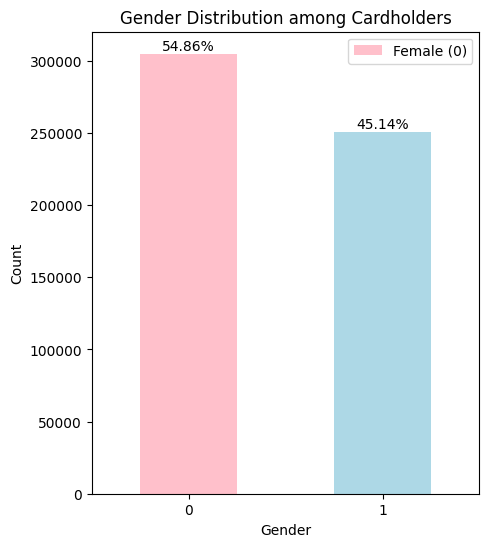

In [113]:
#q6 Gender Distribution
total_count = df['gender_encoded'].count()  # Calculate total count

# Define custom colors for each gender category
colors = ['pink', 'lightblue']

# Create a bar chart
plt.figure(figsize=(5, 6))
bars = df['gender_encoded'].value_counts().plot(kind='bar', color=colors)  # Plot the value counts directly
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution among Cardholders')

# Add percentage labels on each bar
for bar in bars.patches:
    height = bar.get_height()
    percentage = height / total_count * 100
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Add custom legend
plt.legend(['Female (0)', 'Male (1)'], loc='upper right')

plt.show()

In [114]:
#q7 Avg poplation of cities where transactions occure 

# Calculate the average population of cities
average_population = df['city_pop'].mean()

print("Average population of cities where transactions occur:", average_population)

Average population of cities where transactions occur: 0.030343546227590654


In [115]:
#q8 What are the most common job titles among cardholders?

job_title_counts = df['job'].value_counts()

# Get the top 10 most common job titles
top_job_titles = job_title_counts.head(10)

print("Top 10 most common job titles among cardholders:")
print(top_job_titles)

Top 10 most common job titles among cardholders:
job
Film/video editor             4119
Exhibition designer           3968
Surveyor, land/geomatics      3756
Naval architect               3750
Designer, ceramics/pottery    3463
Materials engineer            3441
Environmental consultant      3427
Financial adviser             3304
IT trainer                    3264
Systems developer             3262
Name: count, dtype: int64


In [ ]:
#q9 What is the age distribution of cardholders based on their date of birth?

import plotly.express as px
from datetime import datetime
current_year = datetime.now().year
df['age'] = current_year - df['dob'].dt.year

fig = px.histogram(df, x='age', nbins=20, labels={'age': 'Age', 'count': 'Frequency'}, title='Age Distribution of Cardholders')
fig.show()

In [ ]:
#q10 Correlation between transaction amt and citypopulation 

# Calculate the correlation coefficient between 'amt' (transaction amount) and 'city_pop' (city population)
correlation = df['amt'].corr(df['city_pop'])

print("Correlation coefficient between transaction amount and city population:", correlation)

Correlation coefficient between transaction amount and city population: 0.002759585510766218


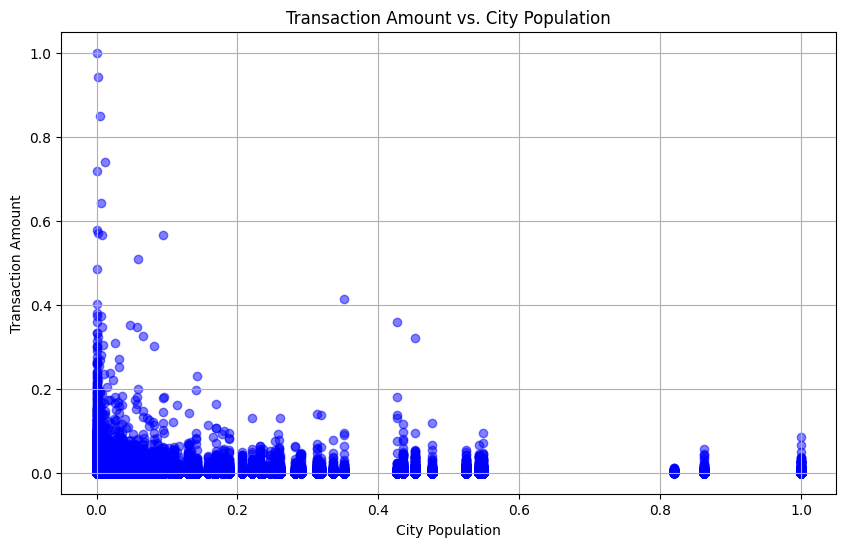

In [118]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['city_pop'], df['amt'], alpha=0.5, color='blue')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. City Population')
plt.grid(True)
plt.show()

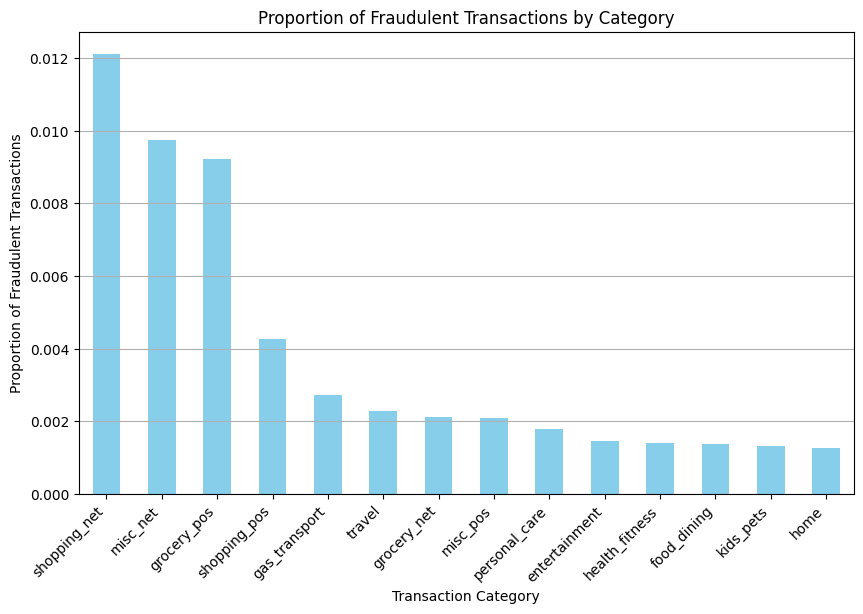

In [119]:
#advance analytics
#1
import matplotlib.pyplot as plt

# Group the data by transaction category and calculate the proportions
fraudulent_transactions = df[df['is_fraud'] == 1]
category_counts = df['category'].value_counts()
fraud_counts = fraudulent_transactions['category'].value_counts()
fraud_proportions = (fraud_counts / category_counts).sort_values(ascending=False)

# Plot the proportions
plt.figure(figsize=(10, 6))
fraud_proportions.plot(kind='bar', color='skyblue')
plt.xlabel('Transaction Category')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.title('Proportion of Fraudulent Transactions by Category')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

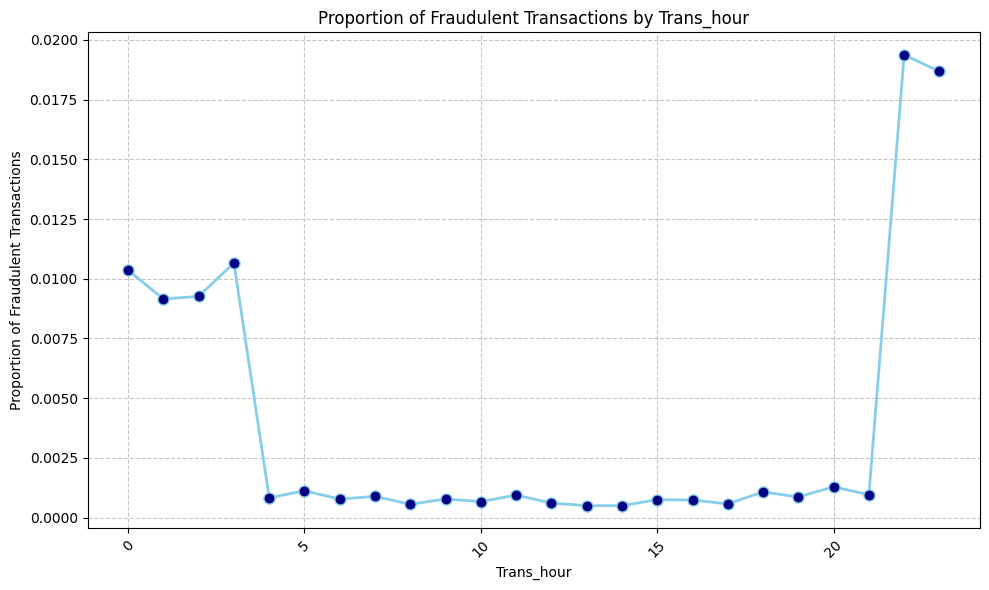

In [120]:
#2

# Extract hour, day, or month from the transaction timestamp
df['trans_hour'] = df['trans_date_trans_time'].dt.hour
df['trans_day'] = df['trans_date_trans_time'].dt.day
df['trans_month'] = df['trans_date_trans_time'].dt.month

# Group the data by transaction time unit and calculate the proportions
time_unit = 'trans_hour'  # Change this to 'trans_day' or 'trans_month' for different time units
fraudulent_transactions = df[df['is_fraud'] == 1]
time_unit_counts = df[time_unit].value_counts()
fraud_counts = fraudulent_transactions[time_unit].value_counts()
fraud_proportions = (fraud_counts / time_unit_counts).sort_index()

# Plot the proportions with enhanced styling
plt.figure(figsize=(10, 6))
fraud_proportions.plot(kind='line', marker='o', color='skyblue', linewidth=2, markersize=8, markerfacecolor='navy')
plt.xlabel(f'{time_unit.capitalize()}')
plt.ylabel('Proportion of Fraudulent Transactions')
plt.title(f'Proportion of Fraudulent Transactions by {time_unit.capitalize()}')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [121]:
# Convert 'street', 'city', and 'state' columns to string
df['street'] = df['street'].astype(str)
df['city'] = df['city'].astype(str)
df['state'] = df['state'].astype(str)

In [122]:
import plotly.express as px

# Group data by state and count unique cardholders, merchants, and fraudulent transactions
state_counts = df.groupby('state').agg({
    'cc_num': 'nunique',  # Count unique cardholders
    'merchant': 'nunique',  # Count unique merchants
    'is_fraud': 'sum'  # Sum of fraudulent transactions
}).reset_index()

# Rename columns for clarity
state_counts.columns = ['State', 'Cardholders', 'Merchants', 'Fraudulent Transactions']

# Create a bar plot
fig = px.bar(state_counts, x='State', y=['Cardholders', 'Merchants', 'Fraudulent Transactions'],
             title='Number of Cardholders, Merchants, and Fraudulent Transactions per State',
             labels={'value': 'Count', 'variable': 'Category'}, barmode='group')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [123]:
import plotly.express as px

# Calculate the proportion of fraudulent transactions for each job title
fraud_by_job = df.groupby('job')['is_fraud'].mean().reset_index()

# Sort the data by the proportion of fraudulent transactions
fraud_by_job = fraud_by_job.sort_values(by='is_fraud', ascending=False)

# Create a bar plot using Plotly Express
fig = px.bar(fraud_by_job, x='is_fraud', y='job', orientation='h', 
             title='Proportion of Fraudulent Transactions by Job Title',
             labels={'is_fraud': 'Proportion of Fraudulent Transactions', 'job': 'Job Title'},
             color='is_fraud',
             color_continuous_scale='viridis')

# Customize layout
fig.update_layout(width=800, height=600, plot_bgcolor='rgba(0,0,0,0)', 
                  xaxis=dict(title=dict(text='Proportion of Fraudulent Transactions')),
                  yaxis=dict(title=dict(text='Job Title')))
fig.show()

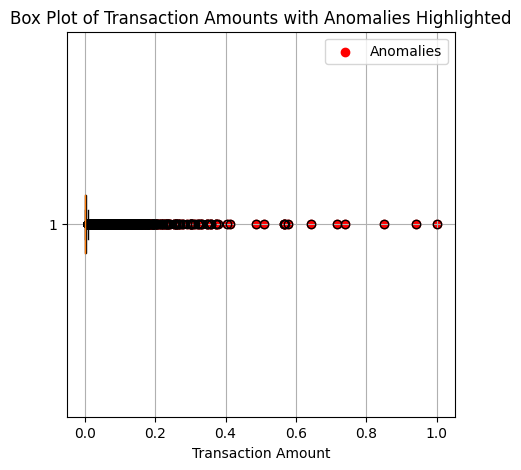

In [124]:
#5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calculate Z-score for transaction amounts
df['amt_zscore'] = (df['amt'] - df['amt'].mean()) / df['amt'].std()

# Set a threshold for anomaly detection
threshold = 3 # You can adjust this threshold based on your data and requirements

# Identify anomalies
anomalies = df[df['amt_zscore'] > threshold]

# Create a box plot to visualize the distribution of transaction amounts
plt.figure(figsize=(5, 5))
plt.boxplot(df['amt'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.scatter(anomalies['amt'], np.ones_like(anomalies['amt']), color='red', label='Anomalies')
plt.xlabel('Transaction Amount')
plt.title('Box Plot of Transaction Amounts with Anomalies Highlighted')
plt.legend()
plt.grid(True)
plt.show()

In [125]:
#6
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix


# Feature Engineering: Create new features based on combinations of transaction attributes
df['unusual_amount'] = (df['amt'] > df['amt'].mean() + 3 * df['amt'].std()).astype(int)
df['uncommon_merchant'] = df['merchant'].map(df['merchant'].value_counts() < 10).astype(int)
df['late_night_transaction'] = ((df['trans_hour'] < 6) | (df['trans_hour'] > 20)).astype(int)

# Define features and target variable
features = ['amt', 'unusual_amount', 'uncommon_merchant', 'late_night_transaction']
target = 'is_fraud'

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9956812783416109
Confusion Matrix:
[[110534    184]
 [   296    130]]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



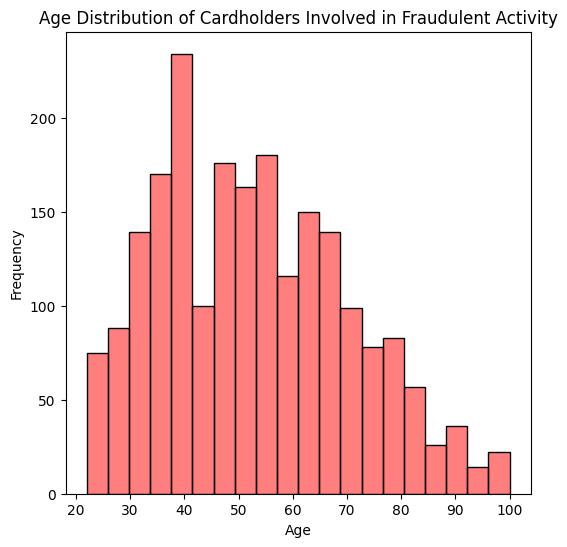

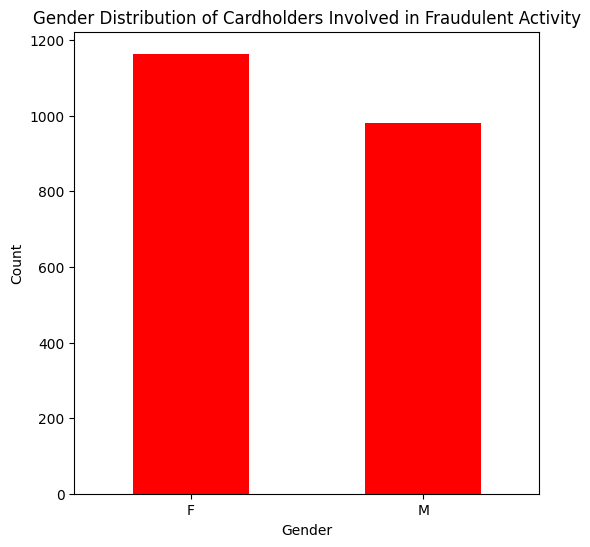

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Plotting age distribution
plt.figure(figsize=(6, 6))
sns.histplot(fraudulent_transactions['age'], bins=20, color='red', alpha=0.5)
plt.title('Age Distribution of Cardholders Involved in Fraudulent Activity')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting gender distribution
plt.figure(figsize=(6, 6))
fraud_gender_counts = fraudulent_transactions['gender'].value_counts()
fraud_gender_counts.plot(kind='bar', color='red')
plt.title('Gender Distribution of Cardholders Involved in Fraudulent Activity')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [127]:
import pandas as pd

# Filter data for fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# 1. Age Distribution of Cardholders Involved in Fraudulent Activity
print("Age Distribution of Cardholders Involved in Fraudulent Activity:")
print(f"Mean Age: {fraudulent_transactions['age'].mean()}")
print(f"Median Age: {fraudulent_transactions['age'].median()}")
print(f"Standard Deviation of Age: {fraudulent_transactions['age'].std()}")

# 2. Gender Distribution of Cardholders Involved in Fraudulent Activity
print("\nGender Distribution of Cardholders Involved in Fraudulent Activity:")
gender_counts = fraudulent_transactions['gender'].value_counts()
print(gender_counts)

# 3. Location Distribution of Cardholders Involved in Fraudulent Activity
# Assuming latitude and longitude columns are available in the DataFrame
if 'merch_lat' in fraudulent_transactions.columns and 'merch_long' in fraudulent_transactions.columns:
    print("\nLocation Distribution of Cardholders Involved in Fraudulent Activity:")
    print(f"Mean Latitude: {fraudulent_transactions['merch_lat'].mean()}")
    print(f"Mean Longitude: {fraudulent_transactions['merch_long'].mean()}")
else:
    print("\nLocation information not available.")

Age Distribution of Cardholders Involved in Fraudulent Activity:
Mean Age: 52.738461538461536
Median Age: 52.0
Standard Deviation of Age: 17.618287291116882

Gender Distribution of Cardholders Involved in Fraudulent Activity:
gender
F    1164
M     981
Name: count, dtype: int64

Location Distribution of Cardholders Involved in Fraudulent Activity:
Mean Latitude: 0.4195259157581879
Mean Longitude: 0.7642067539730957


In [128]:
import pandas as pd
import plotly.express as px

# Convert it to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Extract date components (e.g., year, month, day, day of week)
df['transaction_date'] = df['trans_date_trans_time'].dt.date
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df['transaction_day'] = df['trans_date_trans_time'].dt.day
df['transaction_day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Monday=0, Sunday=6

# Filter fraudulent transactions
fraudulent_transactions = df[df['is_fraud'] == 1]

# Aggregate fraudulent transactions by month, day, or day of week
# Example: Monthly aggregation
monthly_fraudulent_counts = fraudulent_transactions.groupby('transaction_month').size().reset_index(name='count')

# Create a 3D scatter plot
fig = px.scatter_3d(monthly_fraudulent_counts, x='transaction_month', y='count', z='count',
                    color='count', size='count', size_max=30,
                    title='Monthly Seasonal Pattern of Fraudulent Transactions',
                    labels={'transaction_month': 'Month', 'count': 'Number of Fraudulent Transactions'},
                    opacity=0.7)
fig.update_layout(scene=dict(xaxis_title='Month', yaxis_title='Number of Fraudulent Transactions', zaxis_title='Number of Fraudulent Transactions'))
fig.show()

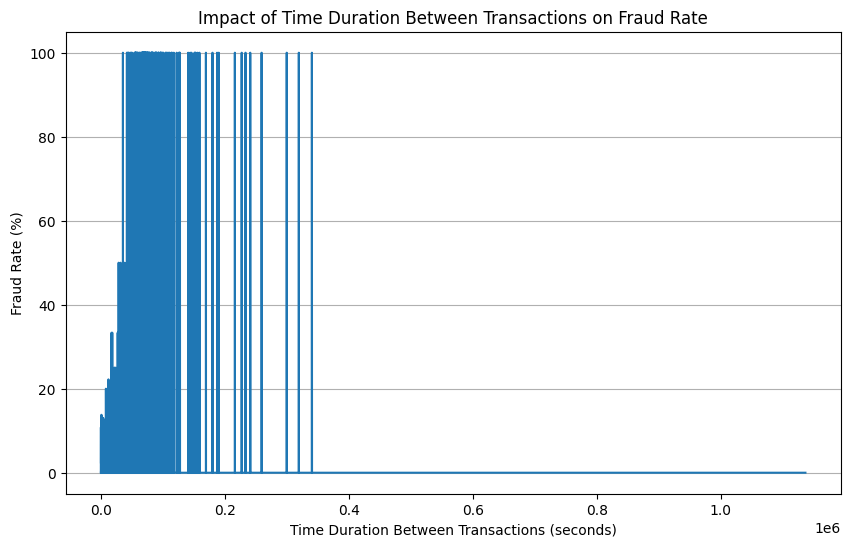

In [129]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'trans_date_trans_time' column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort dataframe by card number and transaction time
df.sort_values(['cc_num', 'trans_date_trans_time'], inplace=True)

# Calculate time duration between consecutive transactions for each cardholder
df['time_duration'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()

# Remove NaN values resulting from the diff operation
df.dropna(subset=['time_duration'], inplace=True)

# Compute fraud rate for each time duration
fraud_rate = df.groupby('time_duration')['is_fraud'].mean() * 100

# Plot the relationship between time duration and fraud rate
plt.figure(figsize=(10, 6))
plt.plot(fraud_rate.index, fraud_rate.values)
plt.xlabel('Time Duration Between Transactions (seconds)')
plt.ylabel('Fraud Rate (%)')
plt.title('Impact of Time Duration Between Transactions on Fraud Rate')
plt.grid(axis='y')
plt.show()

In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score


# Step 1: Prepare the Data
X = df.drop(['is_fraud', 'trans_date_trans_time', 'dob', 'transaction_date', 'first', 'last', 'street', 'trans_num'], axis=1)
y = df['is_fraud']

# Step 2: Feature Engineering
# Label encode categorical variables
cat_columns = ['merchant', 'category', 'gender', 'city', 'state', 'job']
for col in cat_columns:
    label_encoder = LabelEncoder()
    X[col] = label_encoder.fit_transform(X[col])

# Step 3: Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build an XGBoost Model
model = XGBClassifier()
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc_roc= roc_auc_score(y_test, y_pred)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)
print("Roc - auc score",auc_roc)

Accuracy: 0.9993060499824259
Confusion Matrix:
 [[110525      5]
 [    72    357]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110530
           1       0.99      0.83      0.90       429

    accuracy                           1.00    110959
   macro avg       0.99      0.92      0.95    110959
weighted avg       1.00      1.00      1.00    110959

Roc - auc score 0.91606129779024


In [131]:
from sklearn.linear_model import LogisticRegression 

# Step 6: Build a Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 7: Evaluate the Logistic Regression Model
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_lr)

print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", classification_rep_lr)
print("ROC-AUC Score:", auc_roc_lr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Logistic Regression Model:
Accuracy: 0.9961337070449445
Confusion Matrix:
 [[110530      0]
 [   429      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110530
           1       0.00      0.00      0.00       429

    accuracy                           1.00    110959
   macro avg       0.50      0.50      0.50    110959
weighted avg       0.99      1.00      0.99    110959

ROC-AUC Score: 0.5


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



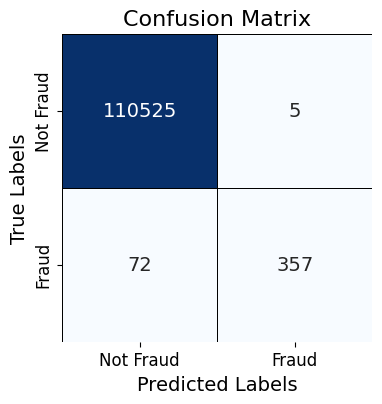

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Plotting confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
            annot_kws={"fontsize": 14}, linewidths=0.5, linecolor="black")
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=14)
plt.ylabel("True Labels", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["Not Fraud", "Fraud"], fontsize=12)
plt.show()

# Calculate ROC curve
#fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC-ROC score
#auc_roc = roc_auc_score(y_test, y_pred)
# Plot ROC curve
#plt.figure(figsize=(5, 5))
#plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate', fontsize=14)
#plt.ylabel('True Positive Rate', fontsize=14)
#plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
#plt.legend(loc="lower right")
#plt.show()

In [133]:
from sklearn.linear_model import LogisticRegression 

# Step 6: Build a Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Step 7: Evaluate the Logistic Regression Model
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
classification_rep_lr = classification_report(y_test, y_pred_lr)
auc_roc_lr = roc_auc_score(y_test, y_pred_lr)

print("\nLogistic Regression Model:")
print("Accuracy:", accuracy_lr)
print("Confusion Matrix:\n", conf_matrix_lr)
print("Classification Report:\n", classification_rep_lr)
print("ROC-AUC Score:", auc_roc_lr)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




Logistic Regression Model:
Accuracy: 0.9961337070449445
Confusion Matrix:
 [[110530      0]
 [   429      0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    110530
           1       0.00      0.00      0.00       429

    accuracy                           1.00    110959
   macro avg       0.50      0.50      0.50    110959
weighted avg       0.99      1.00      0.99    110959

ROC-AUC Score: 0.5


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



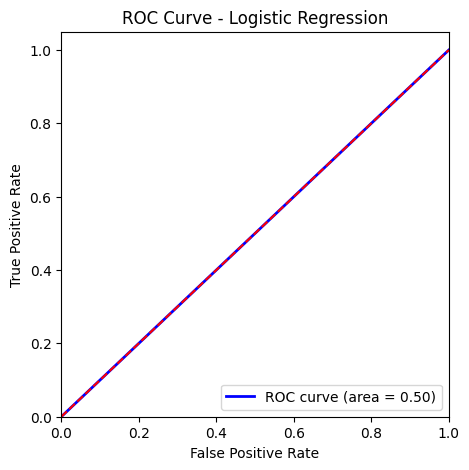

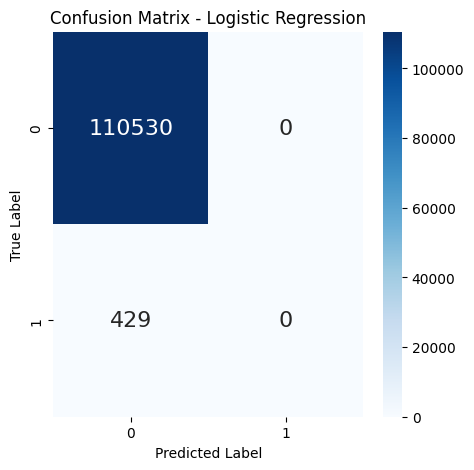

In [134]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)

# Calculate AUC-ROC score
auc_roc_lr = roc_auc_score(y_test, y_pred_lr)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_roc_lr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_lr, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 16})
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [135]:
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC Score:", auc_roc_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)


Random Forest Classifier:
Accuracy: 0.9984228408691499
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    110530
           1       0.97      0.61      0.75       429

    accuracy                           1.00    110959
   macro avg       0.99      0.80      0.87    110959
weighted avg       1.00      1.00      1.00    110959

AUC-ROC Score: 0.8041641385846579
Confusion Matrix:
[[110523      7]
 [   168    261]]


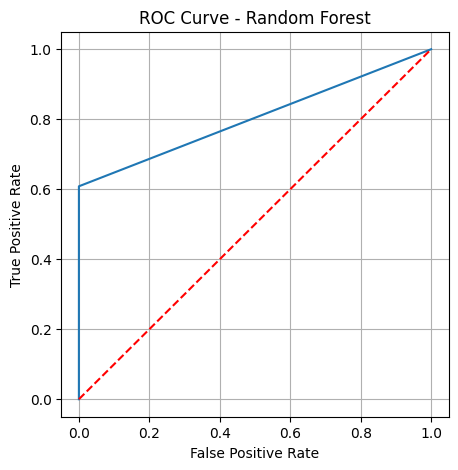

<Figure size 500x500 with 0 Axes>

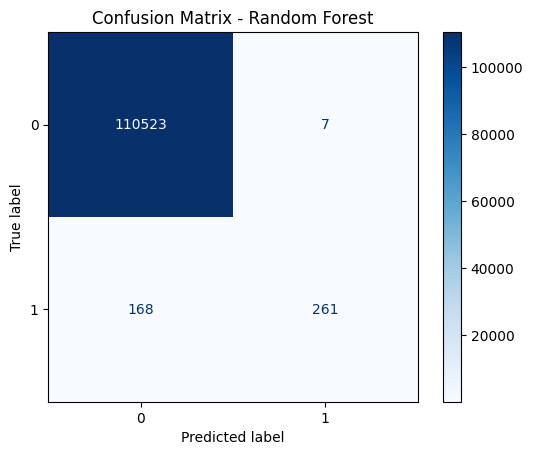

In [136]:
from sklearn.metrics import roc_curve, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

# Plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.grid()
plt.show()

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(5, 5))
ConfusionMatrixDisplay(conf_matrix_rf, display_labels=rf_model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

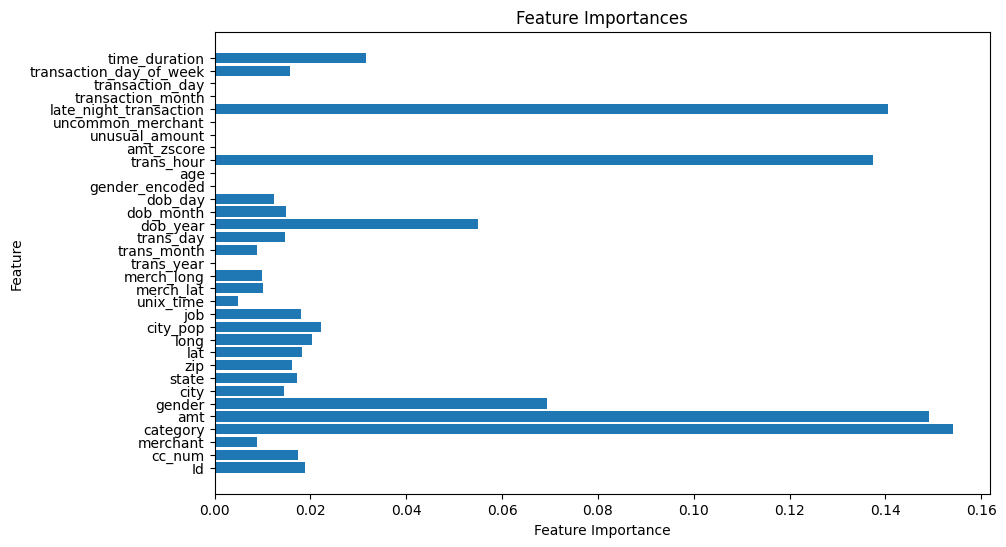

In [137]:
# Importing libraries
import matplotlib.pyplot as plt

# Plotting feature importances
feature_importance = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [138]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [139]:
# Fit the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
late_night_transaction     0.194274
amt                        0.163950
category                   0.136007
trans_hour                 0.106551
unusual_amount             0.051197
dob_year                   0.043767
gender                     0.034383
time_duration              0.027775
city_pop                   0.020118
long                       0.017854
lat                        0.017022
Id                         0.016316
job                        0.016008
state                      0.014994
transaction_day_of_week    0.014809
dob_month                  0.014756
zip                        0.014322
cc_num                     0.013904
trans_day                  0.013863
unix_time                  0.013762
city                       0.013277
dob_day                    0.012770
merch_long                 0.007900
merch_lat                  0.007537
merchant                   0.006833
trans_month                0.006051
transaction_day            0.000000
transact

100%|===================| 110900/110959 [17:49<00:00]        

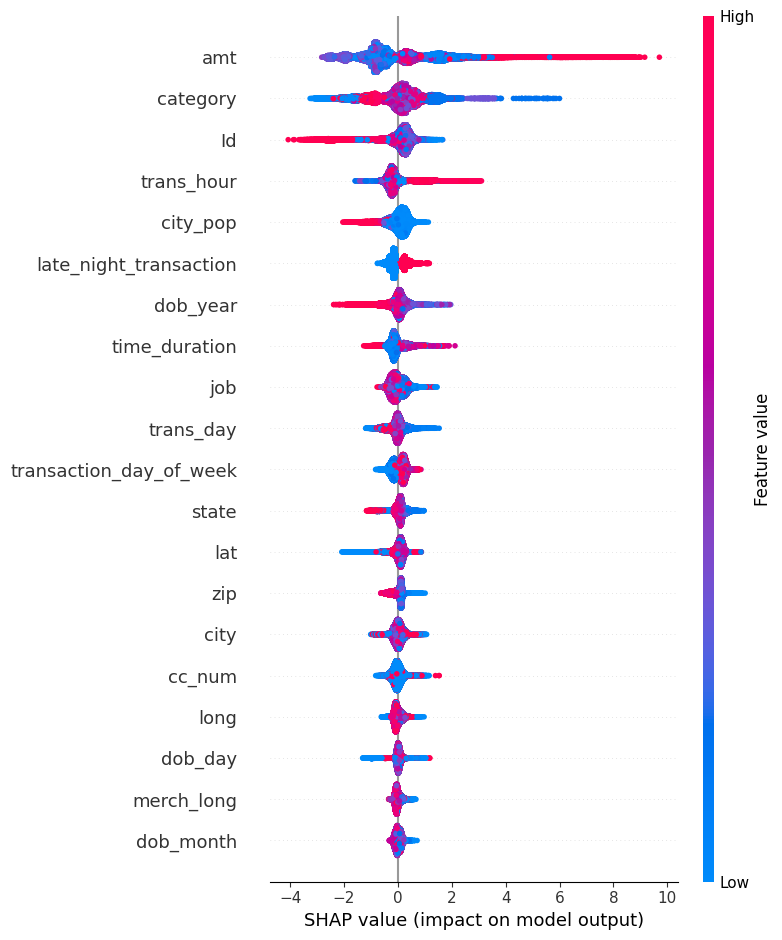

In [140]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)